In [1]:
#required libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [2]:
#loading housing price to dataframe
housing_df = pd.read_csv('housing_price_dataset.csv')

In [3]:
#looking at first 10 rows
housing_df.head(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.28360
1,2459,3,2,Rural,1980,195014.22160
2,1860,2,1,Suburb,1970,306891.01210
3,2294,2,1,Urban,1996,206786.78720
4,2130,5,2,Suburb,2001,272436.23910
5,2095,2,3,Suburb,2020,198208.80390
6,2724,2,1,Suburb,1993,343429.31910
7,2044,4,3,Rural,1957,184992.32130
8,2638,4,3,Urban,1959,377998.58820
9,1121,5,2,Urban,2004,95961.92601


In [4]:
housing_df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165400
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860250
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141150
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630025
max,2999.000000,5.000000,3.000000,2021.000000,492195.260000


In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


**Data visualizations**

array([[<Axes: title={'center': 'SquareFeet'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

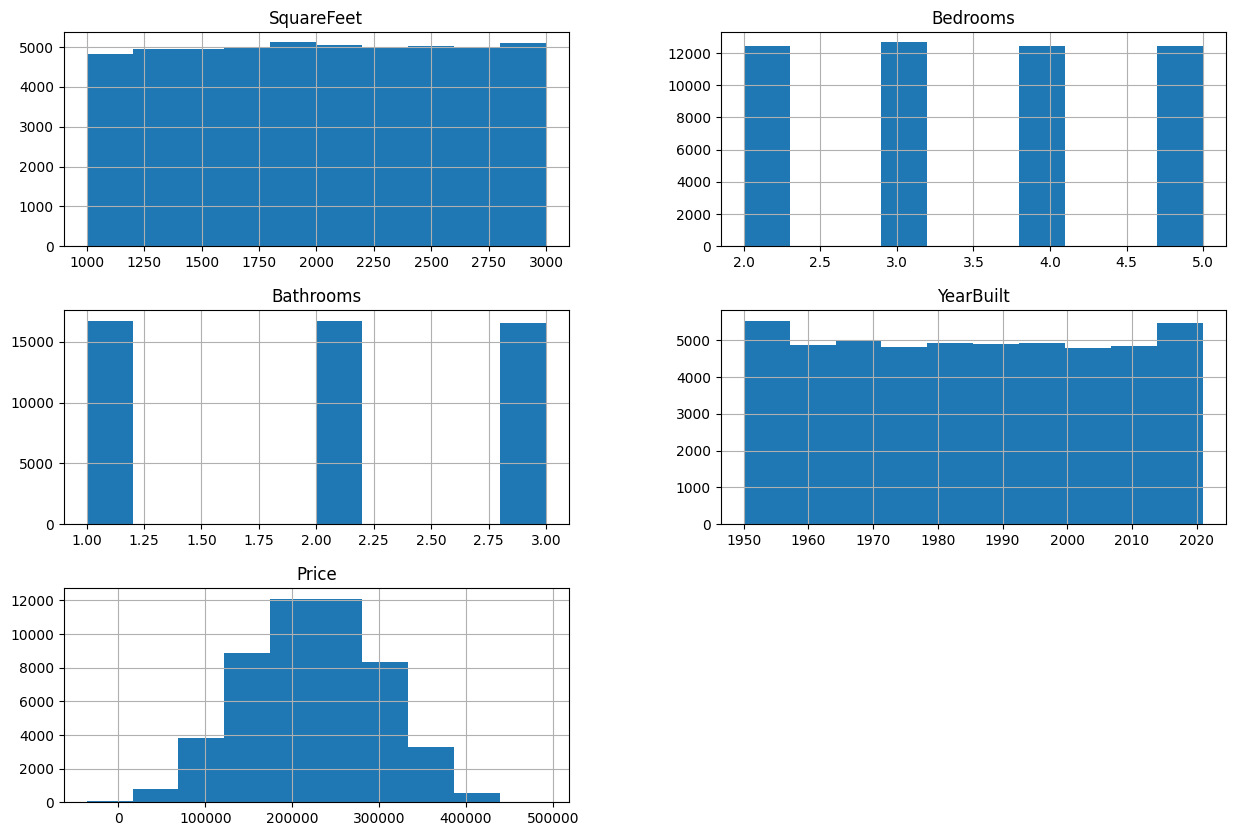

In [6]:
housing_df.hist(figsize=(15,10))

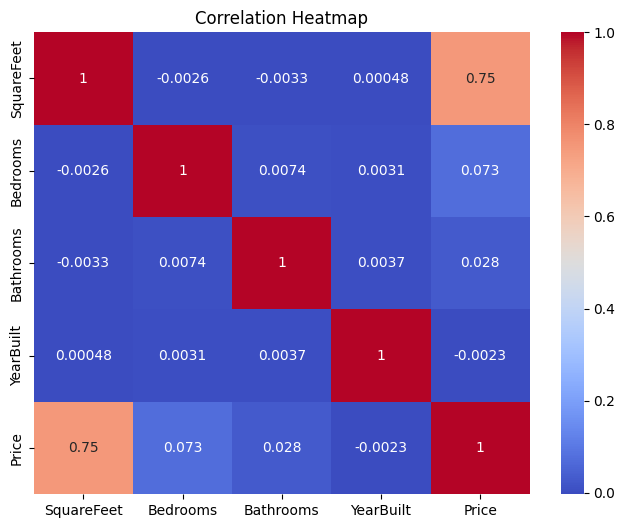

In [7]:
#correlation matirx
corr_matrix = housing_df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']].corr()

# Plotting heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

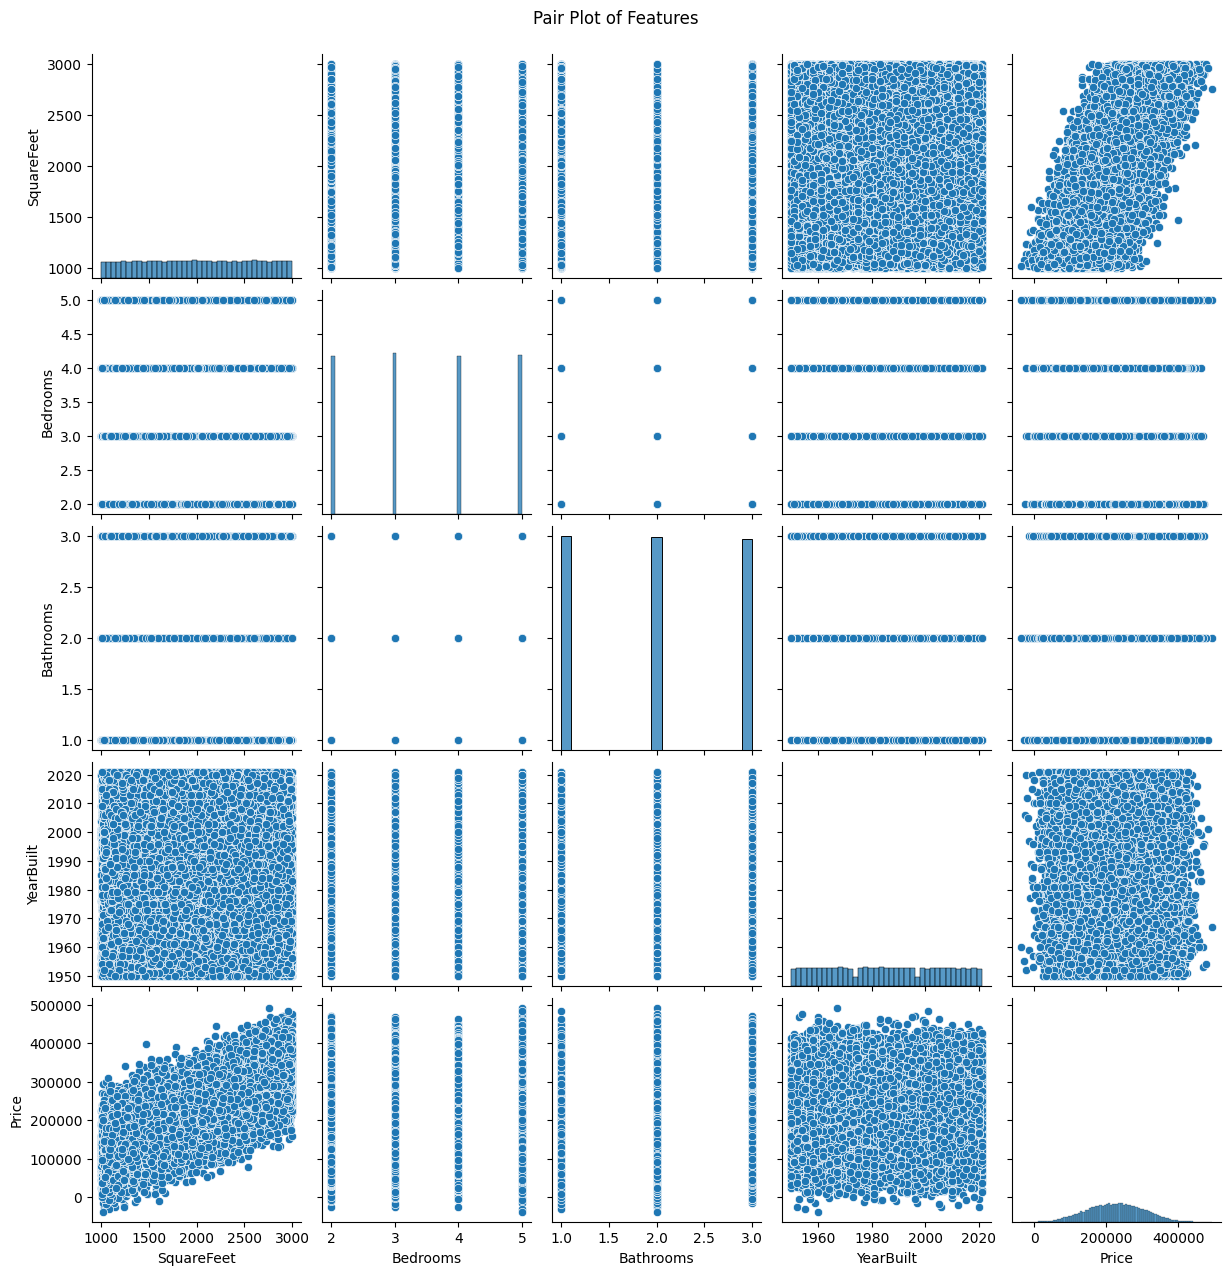

In [8]:
#pair plot
sns.pairplot(housing_df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()


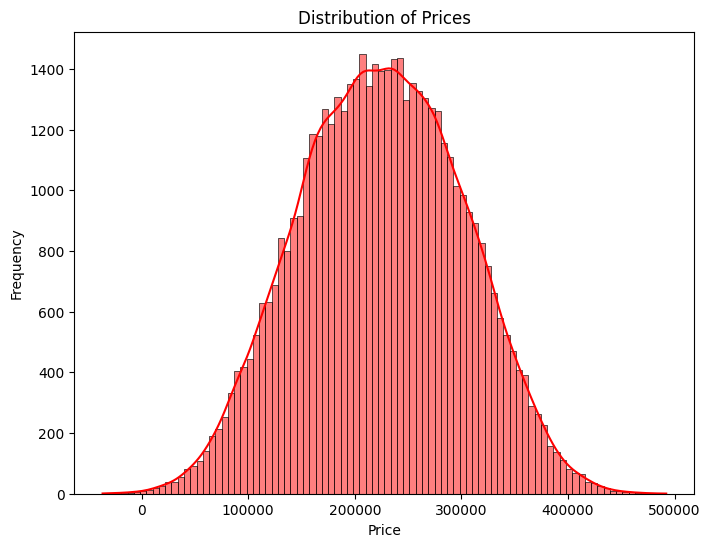

In [9]:
#distribution plot for tarrget variable .. price
plt.figure(figsize=(8,6))
sns.histplot(housing_df['Price'], kde=True, color='red')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


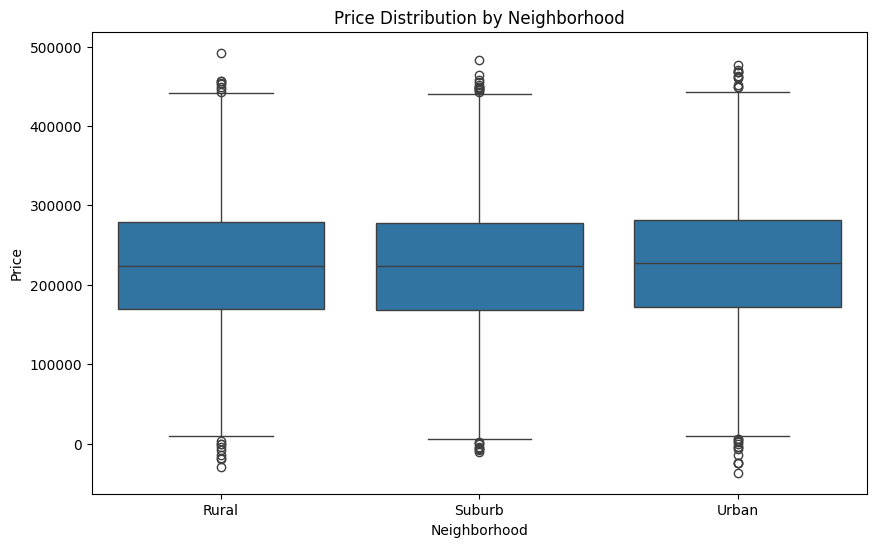

In [10]:
#box plot for categorical variables
plt.figure(figsize=(10,6))
sns.boxplot(x='Neighborhood', y='Price', data=housing_df)
plt.title('Price Distribution by Neighborhood')
plt.show()


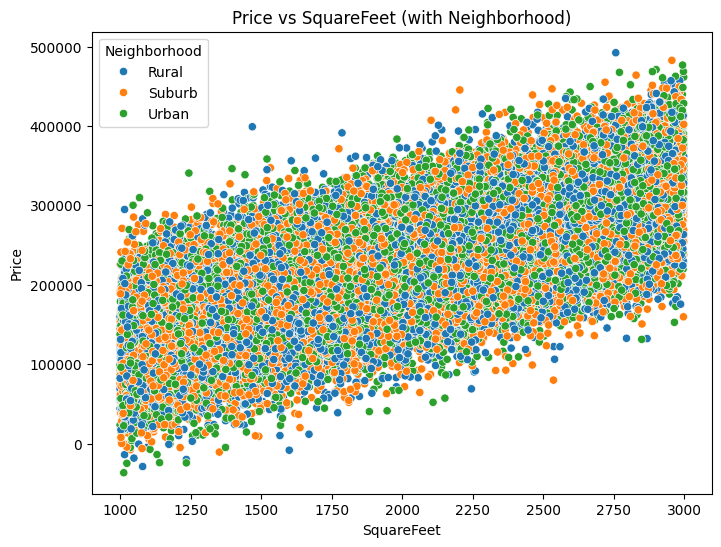

In [11]:
#scatter plot price vs sq. feet
plt.figure(figsize=(8,6))
sns.scatterplot(x='SquareFeet', y='Price', hue='Neighborhood', data=housing_df)
plt.title('Price vs SquareFeet (with Neighborhood)')
plt.xlabel('SquareFeet')
plt.ylabel('Price')
plt.show()


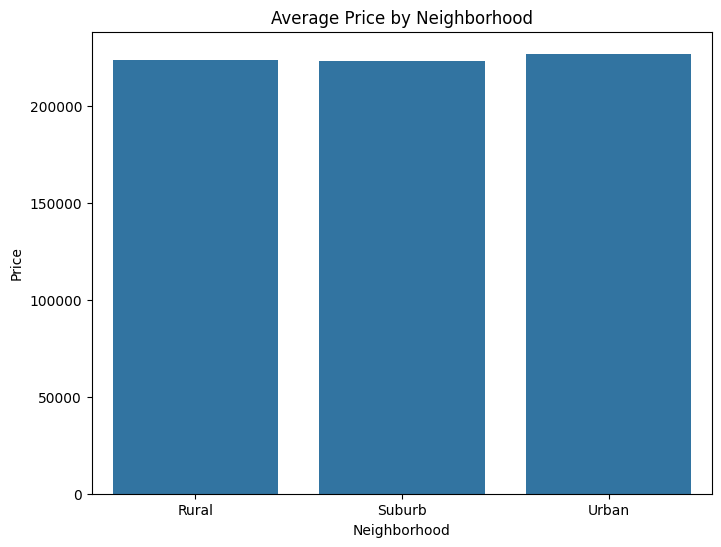

In [12]:
#bar plot of avg. prive by neighborhood
plt.figure(figsize=(8,6))
avg_price_by_neighborhood = housing_df.groupby('Neighborhood')['Price'].mean().reset_index()
sns.barplot(x='Neighborhood', y='Price', data=avg_price_by_neighborhood)
plt.title('Average Price by Neighborhood')
plt.show()


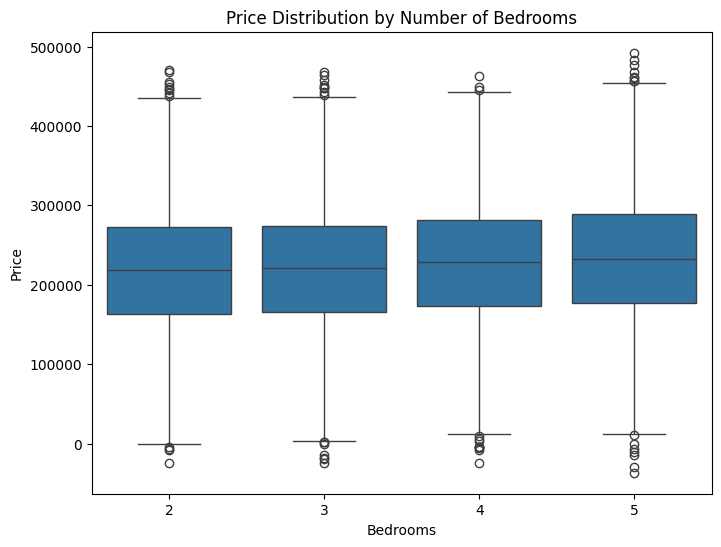

In [13]:
#box plot for bedrooms
plt.figure(figsize=(8,6))
sns.boxplot(x='Bedrooms', y='Price', data=housing_df)
plt.title('Price Distribution by Number of Bedrooms')
plt.show()


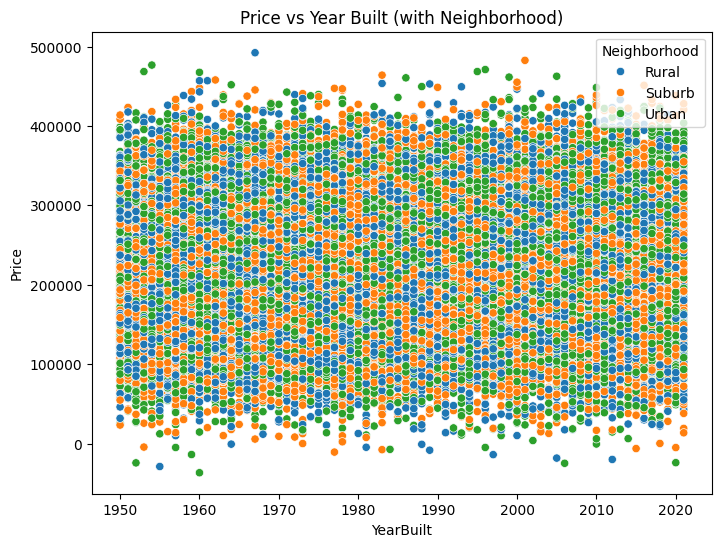

In [14]:
#scatter plot year build vs price
plt.figure(figsize=(8,6))
sns.scatterplot(x='YearBuilt', y='Price', hue='Neighborhood', data=housing_df)
plt.title('Price vs Year Built (with Neighborhood)')
plt.xlabel('YearBuilt')
plt.ylabel('Price')
plt.show()


**Data preprocessing**

**Clean**

**Transform**

**organize data into suitable format for training**

In [15]:
housing_df['Neighborhood'].value_counts()

Neighborhood
Suburb    16721
Rural     16676
Urban     16603
Name: count, dtype: int64

In [16]:
#checking if there exists null values
housing_df.isna().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

**train-test split**

In [17]:
X = housing_df.drop(columns=['Price'])
y = housing_df['Price']

# Split data into training and test sets (75% training, 25% testing)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape)
print(y_train.shape)
X_test.columns

(35000, 5)
(35000,)


Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt'], dtype='object')

**Feature scaling and Feature encoding**

In [18]:

# Encode categorical variables (fit on training, transform both train and test)

l_encoder = LabelEncoder()
X_train['Neighborhood'] = l_encoder.fit_transform(X_train['Neighborhood'])
X_test['Neighborhood'] = l_encoder.transform(X_test['Neighborhood'])

numerical_features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']

# Standardize the features (scaling)
scaler_X = StandardScaler()
X_train[numerical_features] = scaler_X.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler_X.transform(X_test[numerical_features])

# Scaling the target (Price)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

**cross validation for different models**

In [19]:


# Define the models to test
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Dictionary to store cross-validation results
cv_results = {}

# Perform cross-validation for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train.ravel(), cv=5, scoring='neg_mean_squared_error')
    cv_results[name] = -cv_scores.mean()  # Take the mean MSE for each model

# Print the cross-validation results
for name, mse in cv_results.items():
    print(f"{name}: Mean CV MSE = {mse:.2f}")


Linear Regression: Mean CV MSE = 0.43
Decision Tree: Mean CV MSE = 0.89
Random Forest: Mean CV MSE = 0.48
SVR: Mean CV MSE = 0.44
Gradient Boosting: Mean CV MSE = 0.43


**We are going to model with Linear regression as Decision tree and linear regression gave least MSE**

**Training and evluateing with Linear regression**

In [20]:


# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on both the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Training R^2: {train_r2:.2f}")
print(f"Test R^2: {test_r2:.2f}")


Training MSE: 0.43
Test MSE: 0.43
Training R^2: 0.57
Test R^2: 0.57


**Inrepeting model coefficients and Visualizing Predictions**

Coefficients shape: (5,)
Feature names shape: (5,)
        Feature  Coefficient
0    SquareFeet     0.749810
1      Bedrooms     0.077361
2     Bathrooms     0.032280
3  Neighborhood     0.010118
4     YearBuilt    -0.000297


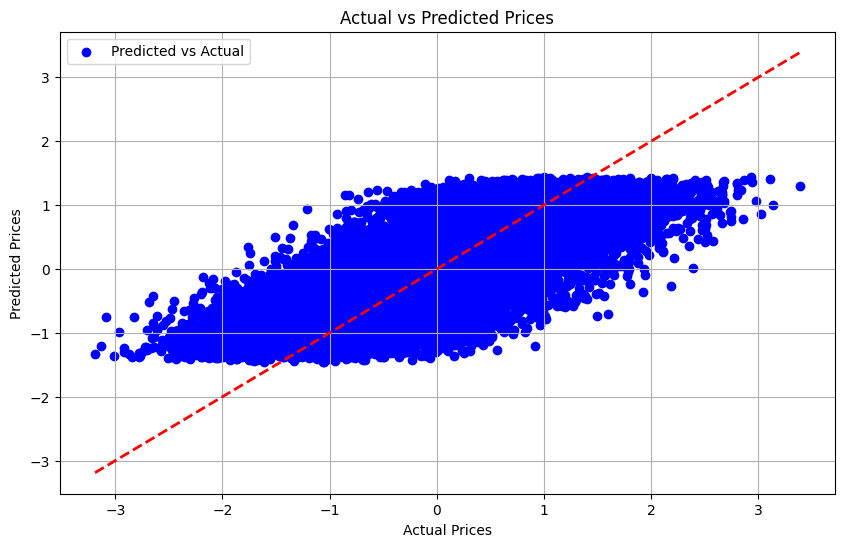

In [21]:
# 1. Interpret Model Coefficients
coefficients = model.coef_.flatten()
feature_names = X_train.columns
# Check the shapes of coefficients and feature names
print(f"Coefficients shape: {coefficients.shape}")
print(f"Feature names shape: {feature_names.shape}")

# Create a DataFrame to display coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df)

# 2. Visualize Predictions
# Scatter plot of actual vs predicted prices for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid()
plt.show()


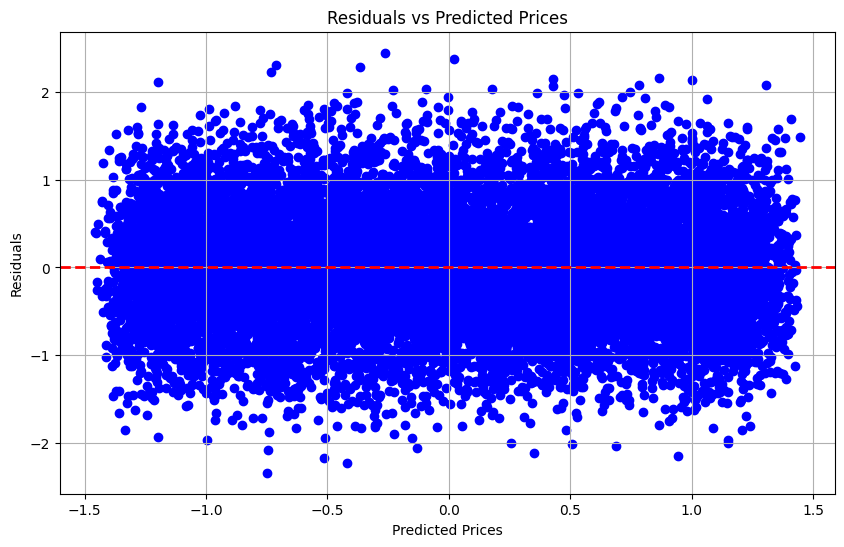

In [22]:
# Calculate residuals
residuals = y_test - y_test_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.grid()
plt.show()


**Saving the Model and Preprocessors**

In [23]:


# Save the trained model and preprocessors using pickle
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler_X.pkl', 'wb') as scaler_x_file:
    pickle.dump(scaler_X, scaler_x_file)

with open('scaler_y.pkl', 'wb') as scaler_y_file:
    pickle.dump(scaler_y, scaler_y_file)

with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(l_encoder, le_file)

print("Model and preprocessors saved successfully using pickle!")


Model and preprocessors saved successfully using pickle!
